In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import quadpy

%config InlineBackend.figure_format = "retina"

# Purpose:
The purpose of this this notebook is to understand of the basics of Kelvin kernel.  The is an old solution (mysteriously presented by Kelvin and nicely presented by Love) give the response of a elastic full space to an applied force at a point.  I think the soluitons were take from Bannerjee and Butterfield but I'm not totally sure.

## Why this is interesting:
The purpose of exploring this is that this solution can be combined with a BEM solution to implement body forces.  That's pretty obvious if the integration is numerically reasonable.  The slightly less obvious thing is that if the integration of this term is reasonable then effective body forces can be used to solve **any** non-linear problem (e.g., plasticity, non-linear viscosity, etc.).  This is one of the great hidden promises of BEMs.

# Kelvin point source solution

In [2]:
def kelvin_point_source(x, y, xoffset, yoffset, fx, fy, mu, nu):
    x = x - xoffset
    y = y - yoffset
    kelvin_displacements = np.zeros((len(x), 2))
    kelvin_stresses = np.zeros((len(x), 3))
    C = 1 / (4 * np.pi * (1 - nu))
    r = np.sqrt(x**2 + y**2)
    g = -C * np.log(r)
    gx = -C * x / (x**2 + y**2)
    gy = -C * y / (x**2 + y**2)
    gxy = C * 2 * x * y / (x**2 + y**2) ** 2
    gxx = C * (x**2 - y**2) / (x**2 + y**2) ** 2
    gyy = -gxx
    kelvin_displacements[:, 0] = fx / (2 * mu) * ((3 - 4 * nu) * g - x * gx) + fy / (
        2 * mu
    ) * (-y * gx)
    kelvin_displacements[:, 1] = fx / (2 * mu) * (-x * gy) + fy / (2 * mu) * (
        (3 - 4 * nu) * g - y * gy
    )
    kelvin_stresses[:, 0] = fx * (2 * (1 - nu) * gx - x * gxx) + fy * (
        2 * nu * gy - y * gxx
    )
    kelvin_stresses[:, 1] = fx * (2 * nu * gx - x * gyy) + fy * (
        2 * (1 - nu) * gy - y * gyy
    )
    kelvin_stresses[:, 2] = fx * ((1 - 2 * nu) * gy - x * gxy) + fy * (
        (1 - 2 * nu) * gx - y * gxy
    )
    return kelvin_displacements, kelvin_stresses


x_offset = 0.0
y_offset = 0
fx = 1.0
fy = 0.5
mu = 1.0
nu = 0.25
n_pts = 100
x_vec = np.linspace(-1.0, 1.0, n_pts)
y_vec = np.linspace(-1.0, 1.0, n_pts)
x_grid, y_grid = np.meshgrid(x_vec, y_vec)
kelvin_displacements, kelvin_stresses = kelvin_point_source(
    x_grid.flatten(), y_grid.flatten(), x_offset, y_offset, fx, fy, mu, nu
)


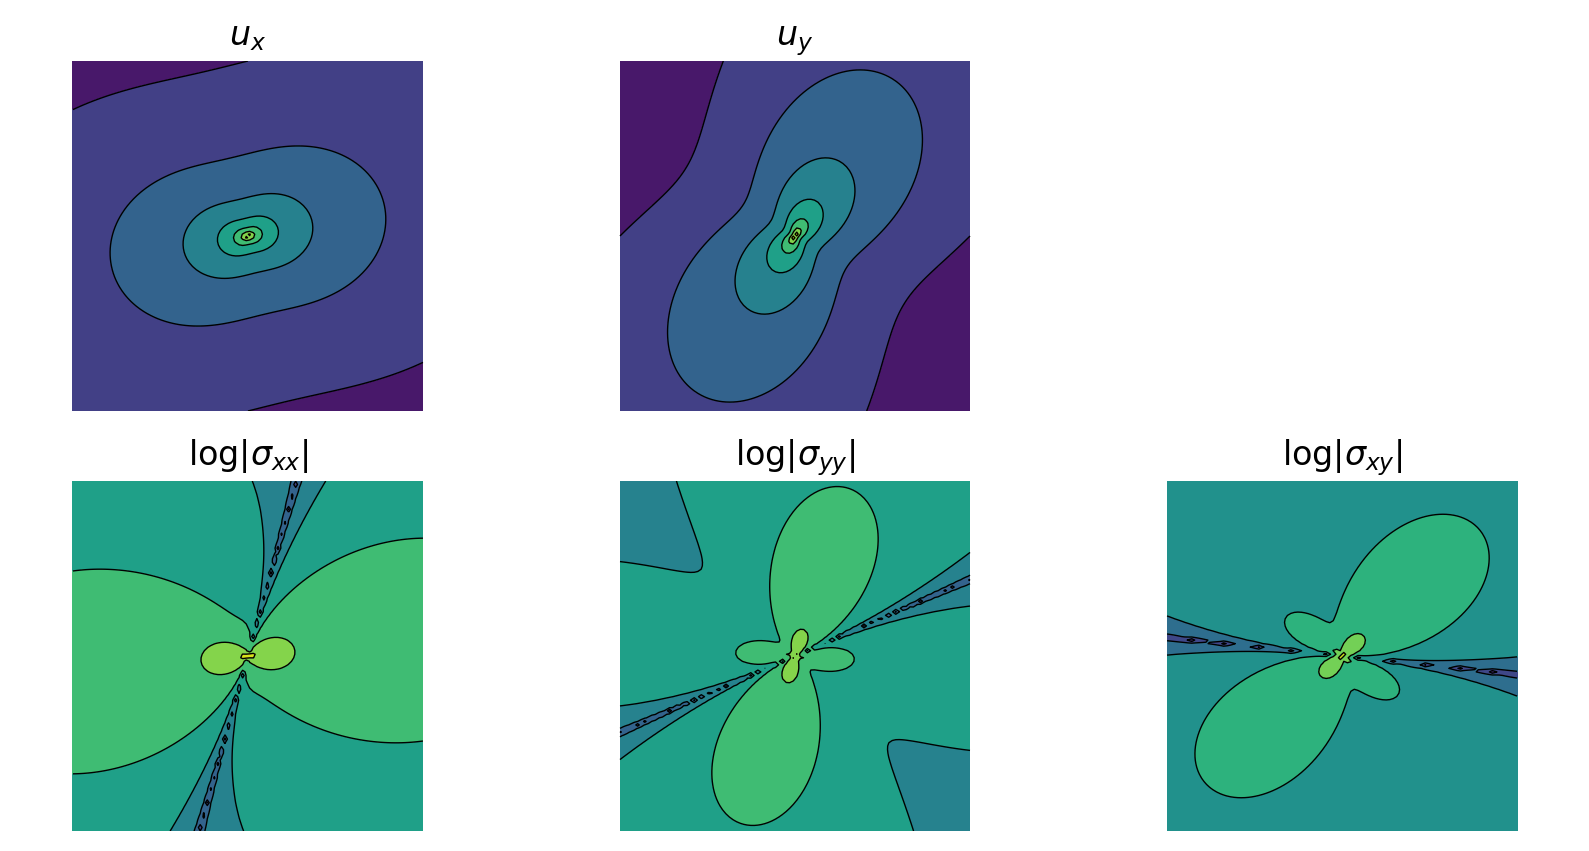

In [3]:
LINEWIDTH = 0.5
plt.figure(figsize=(10, 5))
plt.subplot(2, 3, 1)
plt.contourf(
    x_grid,
    y_grid,
    np.reshape(kelvin_displacements[:, 0], (n_pts, n_pts)),
)
plt.contour(
    x_grid,
    y_grid,
    np.reshape(kelvin_displacements[:, 0], (n_pts, n_pts)),
    colors="k",
    linestyles="solid",
    linewidths=LINEWIDTH,
)
plt.title("$u_x$")
plt.axis("equal")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.contourf(
    x_grid,
    y_grid,
    np.reshape(kelvin_displacements[:, 1], (n_pts, n_pts)),
)
plt.contour(
    x_grid,
    y_grid,
    np.reshape(kelvin_displacements[:, 1], (n_pts, n_pts)),
    colors="k",
    linestyles="solid",
    linewidths=LINEWIDTH,
)
plt.title("$u_y$")
plt.axis("equal")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.contourf(
    x_grid, y_grid, np.log10(np.abs(np.reshape(kelvin_stresses[:, 0], (n_pts, n_pts))))
)
plt.contour(
    x_grid,
    y_grid,
    np.log10(np.abs(np.reshape(kelvin_stresses[:, 0], (n_pts, n_pts)))),
    colors="k",
    linestyles="solid",
    linewidths=LINEWIDTH,
)
plt.title("$\log|\sigma_{xx}|$")
plt.axis("equal")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.contourf(
    x_grid, y_grid, np.log10(np.abs(np.reshape(kelvin_stresses[:, 1], (n_pts, n_pts))))
)
plt.contour(
    x_grid,
    y_grid,
    np.log10(np.abs(np.reshape(kelvin_stresses[:, 1], (n_pts, n_pts)))),
    colors="k",
    linestyles="solid",
    linewidths=LINEWIDTH,
)
plt.title("$\log|\sigma_{yy}|$")
plt.axis("equal")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.contourf(
    x_grid, y_grid, np.log10(np.abs(np.reshape(kelvin_stresses[:, 2], (n_pts, n_pts))))
)
plt.contour(
    x_grid,
    y_grid,
    np.log10(np.abs(np.reshape(kelvin_stresses[:, 2], (n_pts, n_pts)))),
    colors="k",
    linestyles="solid",
    linewidths=LINEWIDTH,
)
plt.title("$\log|\sigma_{xy}|$")
plt.axis("equal")
plt.axis("off")
plt.show()


# Graphical understanding of stress singularity
If this is really $1/r$ in 2D then it should be integrable with some reasonable Guassian (or similar) scheme.

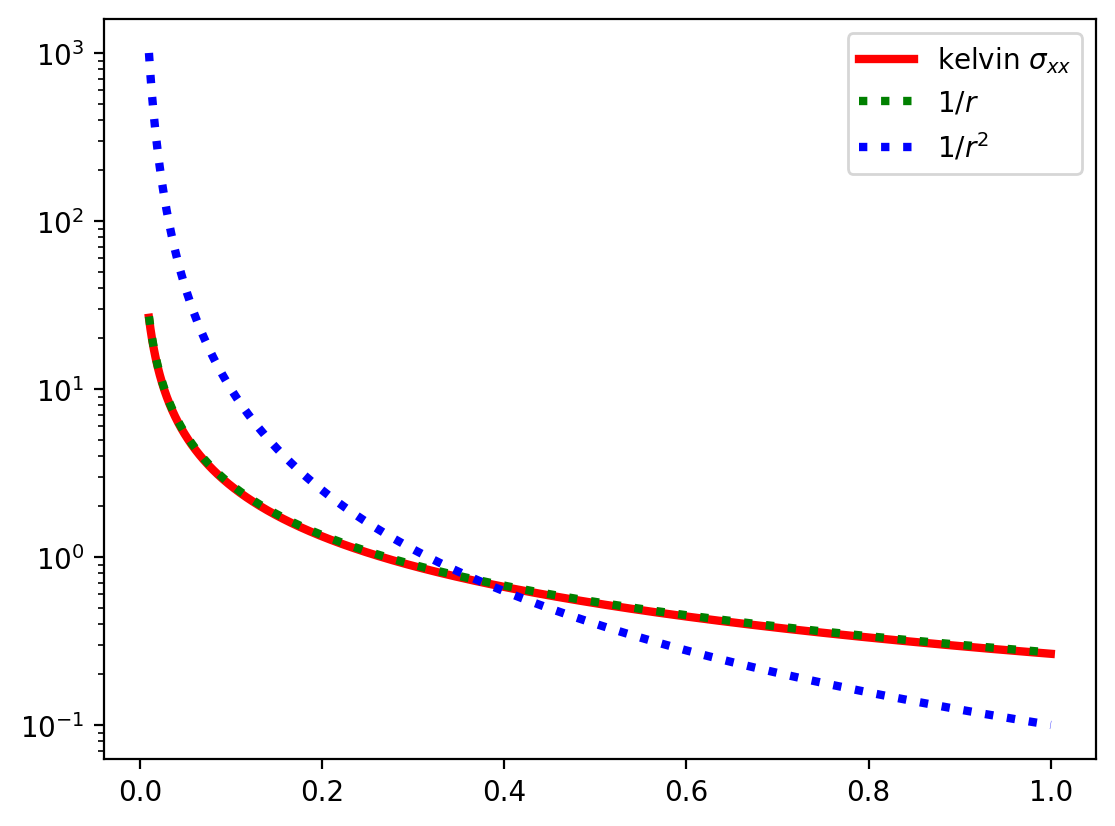

In [4]:
x_offset = 0
y_offset = 0
fx = -1.0
fy = 0.0
mu = 1.0
nu = 0.25
n_pts = 10000
x_vec = np.linspace(1e-2, 1.0, n_pts)
y_vec = np.zeros_like(x_vec)
kelvin_displacements, kelvin_stresses = kelvin_point_source(
    x_vec, y_vec, x_offset, y_offset, fx, fy, mu, nu
)

one_over_r = 1 / (x_vec**1.0)
one_over_r_squared = 1 / (x_vec**2.0)

LINEWIDTH = 3.0
plt.figure()
plt.plot(
    x_vec,
    kelvin_stresses[:, 0],
    "-r",
    linewidth=LINEWIDTH,
    label="kelvin $\sigma_{xx}$",
)
plt.plot(x_vec, 0.27 * one_over_r, ":g", linewidth=LINEWIDTH, label="$1/r$")
plt.plot(x_vec, 0.1 * one_over_r_squared, ":b", linewidth=LINEWIDTH, label="$1/r^2$")

plt.yscale("log")
plt.legend()
plt.show()


# Experiment with quadpy integration
# TLDR: NOT GOOD.
# TODO: Try tanh-sinh?

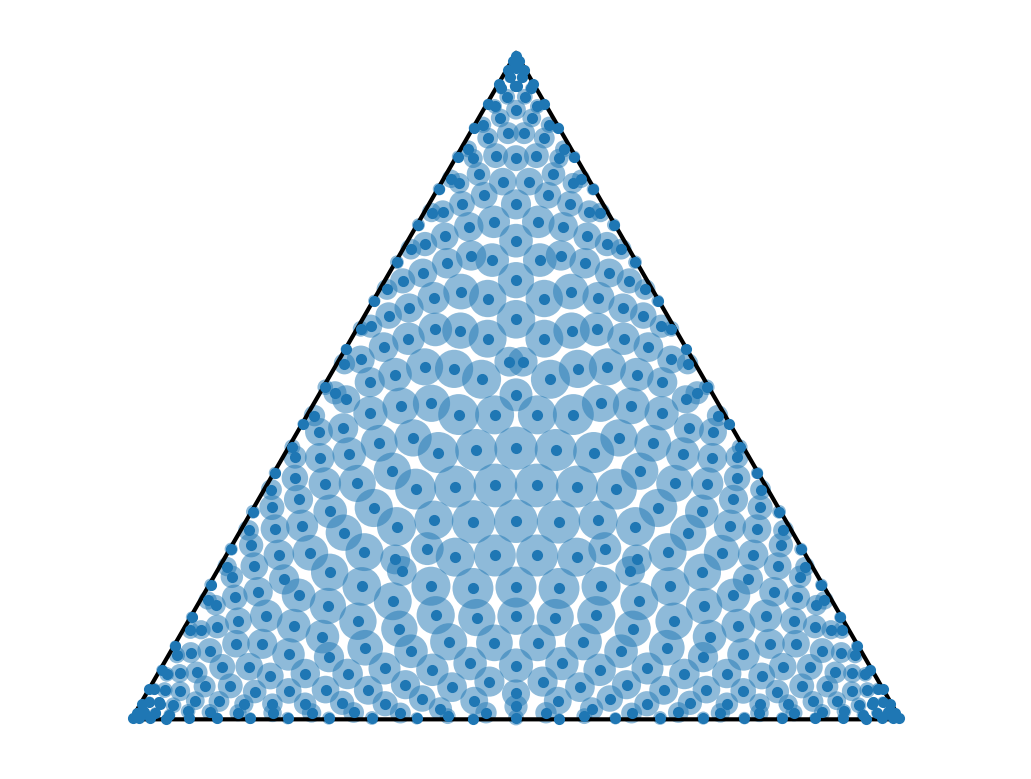

In [25]:
# def f(x):
#     return np.sin(x[0]) * np.sin(x[1])


# triangle = np.array([[0.0, 0.0], [1.0, 0.0], [0.7, 0.5]])
triangle = np.array([[0.0, 0.0], [1.0, 0.0], [0.0, 1.0]])

# get a "good" scheme of degree 10
scheme = quadpy.t2.get_good_scheme(50)
scheme.show()
# val = scheme.integrate(f, triangle)


# Visual inspection of numerical quadrature

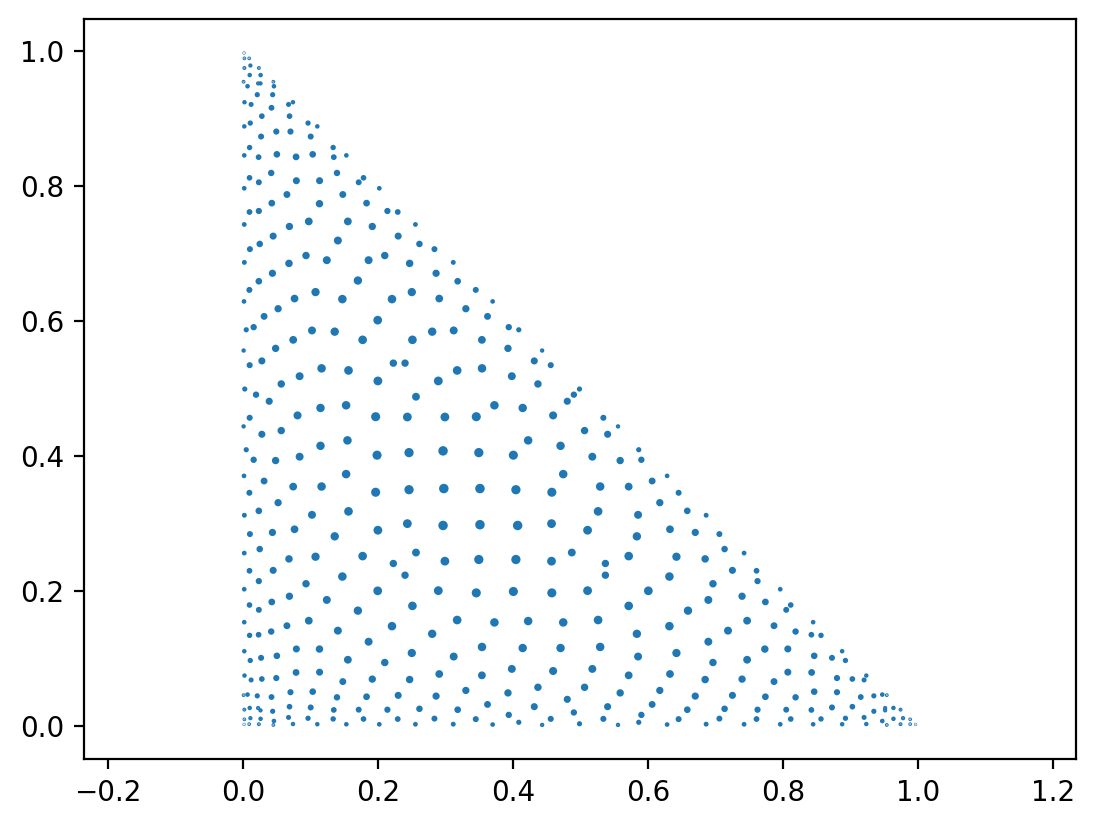

In [26]:
plt.figure()
plt.scatter(scheme.points[0, :], scheme.points[1, :], s=1000 * scheme.weights)
plt.axis("equal")
plt.show()


In [30]:
n_integration_pts = len(scheme.weights)

x_offset = 0.0
y_offset = 0
fx = -1.0
fy = 0.0
mu = 1.0
nu = 0.25
n_observation_pts = 500
x_vec = np.linspace(-1, 2, n_observation_pts)
y_vec = np.linspace(-1, 2, n_observation_pts)
x_grid, y_grid = np.meshgrid(x_vec, y_vec)

kelvin_displacements = np.zeros((n_observation_pts**2, 2))
kelvin_stresses = np.zeros((n_observation_pts**2, 3))

for i in range(n_integration_pts):
    x_offset = scheme.points[1, i]
    y_offset = scheme.points[2, i]
    kelvin_displacements_local, kelvin_stresses_local = kelvin_point_source(
        x_grid.flatten(), y_grid.flatten(), x_offset, y_offset, fx, fy, mu, nu
    )
    kelvin_displacements += scheme.weights[i] * kelvin_displacements_local
    kelvin_stresses += scheme.weights[i] * kelvin_stresses_local


In [31]:
def inpolygon(xq, yq, xv, yv):
    """From: https://stackoverflow.com/questions/31542843/inpolygon-examples-of-matplotlib-path-path-contains-points-method

    Args:
        xq : x coordinates of points to test
        yq : y coordinates of points to test
        xv : x coordinates of polygon vertices
        yv : y coordinates of polygon vertices

    Returns:
        _type_: Boolean like for in or out of polygon
    """
    shape = xq.shape
    xq = xq.reshape(-1)
    yq = yq.reshape(-1)
    xv = xv.reshape(-1)
    yv = yv.reshape(-1)
    q = [(xq[i], yq[i]) for i in range(xq.shape[0])]
    p = matplotlib.path.Path([(xv[i], yv[i]) for i in range(xv.shape[0])])
    return p.contains_points(q).reshape(shape)


inpolygon_vals = inpolygon(
    x_grid.flatten(), y_grid.flatten(), triangle[:, 0], triangle[:, 1]
)

kelvin_displacements[inpolygon_vals, 0] = np.nan
kelvin_displacements[inpolygon_vals, 1] = np.nan

kelvin_stresses[inpolygon_vals, 0] = np.nan
kelvin_stresses[inpolygon_vals, 1] = np.nan
kelvin_stresses[inpolygon_vals, 2] = np.nan


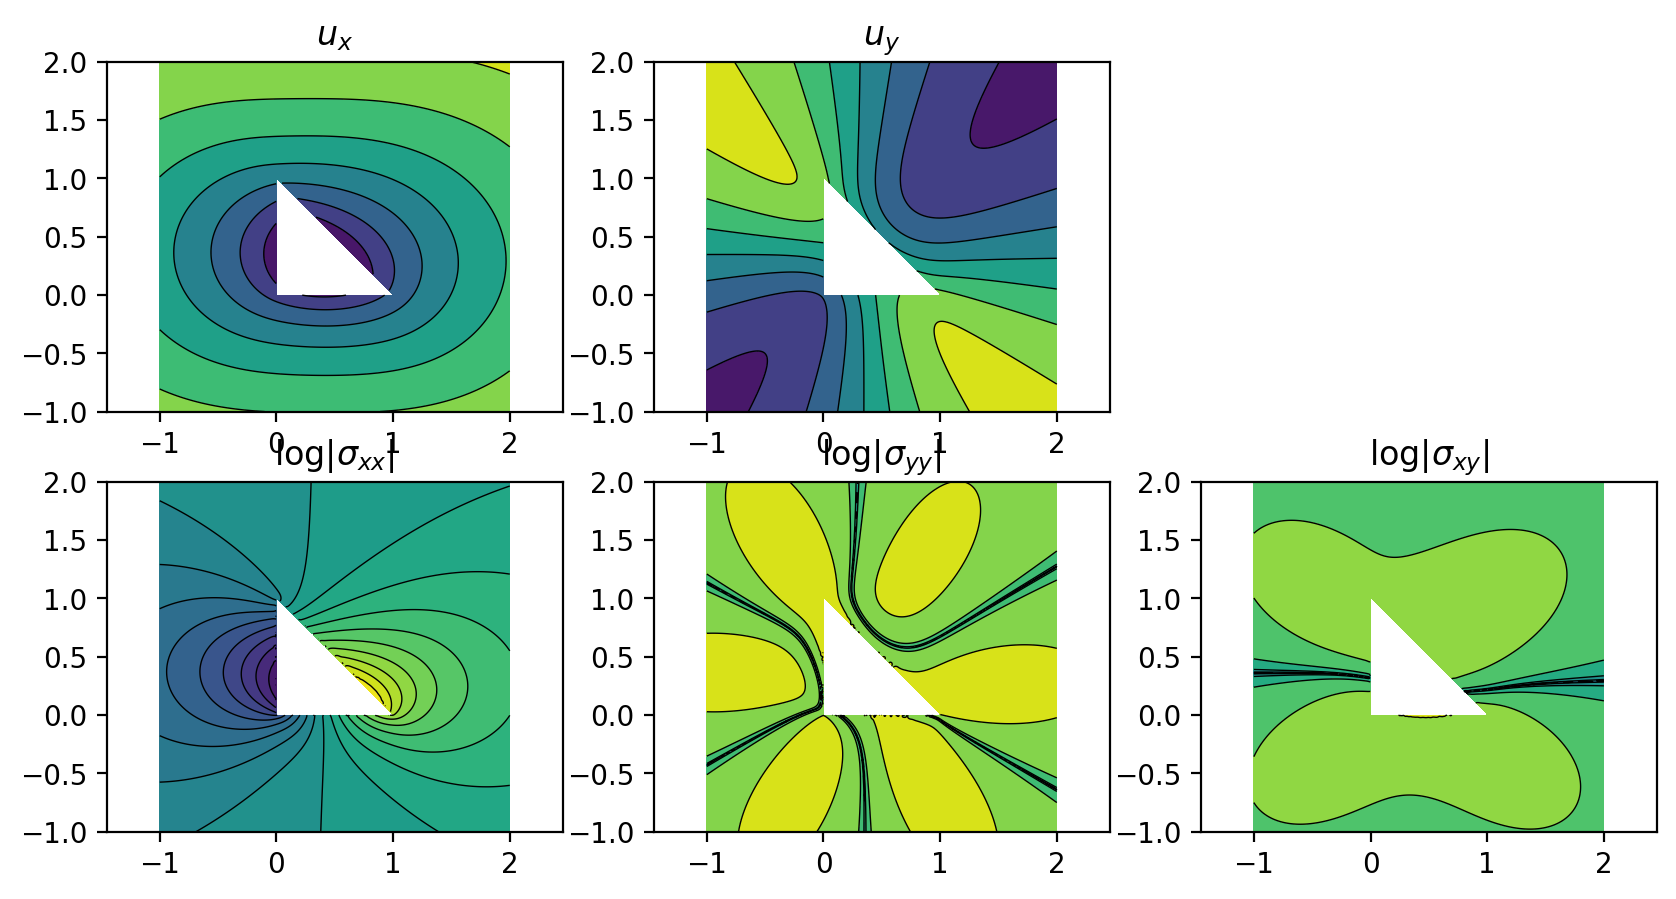

In [33]:
n_pts = n_observation_pts
n_contours = 20
LINEWIDTH = 0.5
plt.figure(figsize=(10, 5))
plt.subplot(2, 3, 1)
plt.contourf(
    x_grid,
    y_grid,
    np.reshape(kelvin_displacements[:, 0], (n_pts, n_pts)),
)
plt.contour(
    x_grid,
    y_grid,
    np.reshape(kelvin_displacements[:, 0], (n_pts, n_pts)),
    colors="k",
    linestyles="solid",
    linewidths=LINEWIDTH,
)
# plt.fill(triangle[:, 0], triangle[:, 1], color="k")
plt.title("$u_x$")
plt.axis("equal")
# plt.axis("off")

plt.subplot(2, 3, 2)
plt.contourf(
    x_grid,
    y_grid,
    np.reshape(kelvin_displacements[:, 1], (n_pts, n_pts)),
)
plt.contour(
    x_grid,
    y_grid,
    np.reshape(kelvin_displacements[:, 1], (n_pts, n_pts)),
    colors="k",
    linestyles="solid",
    linewidths=LINEWIDTH,
)
# plt.fill(triangle[:, 0], triangle[:, 1], color="k")
plt.title("$u_y$")
plt.axis("equal")
# plt.axis("off")

plt.subplot(2, 3, 4)
plt.contourf(x_grid, y_grid, np.reshape(kelvin_stresses[:, 0], (n_pts, n_pts)), levels=n_contours)
plt.contour(
    x_grid,
    y_grid,
    np.reshape(kelvin_stresses[:, 0], (n_pts, n_pts)),
    colors="k",
    linestyles="solid",
    linewidths=LINEWIDTH, levels=n_contours
)
# plt.fill(triangle[:, 0], triangle[:, 1], color="k")
plt.title("$\log|\sigma_{xx}|$")
plt.axis("equal")
# plt.axis("off")

# plt.subplot(2, 3, 4)
# plt.contourf(
#     x_grid, y_grid, np.log10(np.abs(np.reshape(kelvin_stresses[:, 0], (n_pts, n_pts))))
# )
# plt.contour(
#     x_grid,
#     y_grid,
#     np.log10(np.abs(np.reshape(kelvin_stresses[:, 0], (n_pts, n_pts)))),
#     colors="k",
#     linestyles="solid",
#     linewidths=LINEWIDTH,
# )
# # plt.fill(triangle[:, 0], triangle[:, 1], color="k")
# plt.title("$\log|\sigma_{xx}|$")
# plt.axis("equal")
# # plt.axis("off")


plt.subplot(2, 3, 5)
plt.contourf(
    x_grid, y_grid, np.log10(np.abs(np.reshape(kelvin_stresses[:, 1], (n_pts, n_pts))))
)
plt.contour(
    x_grid,
    y_grid,
    np.log10(np.abs(np.reshape(kelvin_stresses[:, 1], (n_pts, n_pts)))),
    colors="k",
    linestyles="solid",
    linewidths=LINEWIDTH,
)
# plt.fill(triangle[:, 0], triangle[:, 1], color="k")
plt.title("$\log|\sigma_{yy}|$")
plt.axis("equal")
# plt.axis("off")

plt.subplot(2, 3, 6)
plt.contourf(
    x_grid, y_grid, np.log10(np.abs(np.reshape(kelvin_stresses[:, 2], (n_pts, n_pts))))
)
# plt.colorbar()

plt.contour(
    x_grid,
    y_grid,
    np.log10(np.abs(np.reshape(kelvin_stresses[:, 2], (n_pts, n_pts)))),
    colors="k",
    linestyles="solid",
    linewidths=LINEWIDTH,
)
# plt.fill(triangle[:, 0], triangle[:, 1], color="k")
plt.title("$\log|\sigma_{xy}|$")
plt.axis("equal")
# plt.axis("off")
plt.show()
